In [1]:
import numpy as np
import copy
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import keras
import os
import pandas as pd
from matplotlib import pyplot as plt
from numpy.random import seed
np.random.seed(2095)

Here we are loading the dataset.

In [7]:
data = pd.read_excel('/content/sample_data/CardiacPrediction.xlsx')

Drops several columns from a DataFrame called "data", including demographic information, health indicators, and blood test results.

In [ ]:
data.drop(['SEQN','Annual-Family-Income','Height','Ratio-Family-Income-Poverty','X60-sec-pulse',
          'Health-Insurance','Glucose','Vigorous-work','Total-Cholesterol','CoronaryHeartDisease','Blood-Rel-Stroke','Red-Cell-Distribution-Width','Triglycerides','Mean-Platelet-Vol','Platelet-count','Lymphocyte','Monocyte','Eosinophils','Mean-cell-Hemoglobin','White-Blood-Cells','Red-Blood-Cells','Basophils','Mean-Cell-Vol','Mean-Cell-Hgb-Conc.','Hematocrit','Segmented-Neutrophils'], axis = 1, inplace=True)



Here we set the value of "Diabetes" column to 1 for all rows where the previous value was 3 in a DataFrame called "data". This is likely a way to recode a 3-category variable (e.g. "No diabetes", "Pre-diabetes", "Diabetes") into a binary variable (e.g. "No diabetes", "Diabetes").

In [8]:
data.loc[data['Diabetes'] == 3, 'Diabetes'] = 1

This code returns the count of unique values in the "Diabetes" column of a DataFrame called "data".

In [9]:
data["Diabetes"].value_counts()

2    32227
1     4852
Name: Diabetes, dtype: int64

This returns basic descriptive statistics (e.g. count, mean, standard deviation, min, max) for the "Diabetes" column of a DataFrame called "data".

In [10]:
data["Diabetes"].describe()

count    37079.000000
mean         1.869144
std          0.337247
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: Diabetes, dtype: float64

In [11]:
data.columns

Index(['SEQN', 'Gender', 'Age', 'Annual-Family-Income',
       'Ratio-Family-Income-Poverty', 'X60-sec-pulse', 'Systolic', 'Diastolic',
       'Weight', 'Height', 'Body-Mass-Index', 'White-Blood-Cells',
       'Lymphocyte', 'Monocyte', 'Eosinophils', 'Basophils', 'Red-Blood-Cells',
       'Hemoglobin', 'Mean-Cell-Vol', 'Mean-Cell-Hgb-Conc.',
       'Mean-cell-Hemoglobin', 'Platelet-count', 'Mean-Platelet-Vol',
       'Segmented-Neutrophils', 'Hematocrit', 'Red-Cell-Distribution-Width',
       'Albumin', 'ALP', 'AST', 'ALT', 'Cholesterol', 'Creatinine', 'Glucose',
       'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 'Uric.Acid',
       'Triglycerides', 'Total-Cholesterol', 'HDL', 'Glycohemoglobin',
       'Vigorous-work', 'Moderate-work', 'Health-Insurance', 'Diabetes',
       'Blood-Rel-Diabetes', 'Blood-Rel-Stroke', 'CoronaryHeartDisease'],
      dtype='object')

In [12]:
data = data[['Gender', 'Age', 'Systolic', 'Diastolic', 'Weight', 'Body-Mass-Index',
       'Hemoglobin', 'Albumin', 'ALP', 'AST', 'ALT', 'Cholesterol',
       'Creatinine', 'GGT', 'Iron', 'LDH', 'Phosphorus',
       'Bilirubin', 'Protein', 'Uric.Acid', 'HDL',
       'Glycohemoglobin', 'Moderate-work',
       'Blood-Rel-Diabetes', 'Diabetes']]


In [13]:
data.columns

Index(['Gender', 'Age', 'Systolic', 'Diastolic', 'Weight', 'Body-Mass-Index',
       'Hemoglobin', 'Albumin', 'ALP', 'AST', 'ALT', 'Cholesterol',
       'Creatinine', 'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin',
       'Protein', 'Uric.Acid', 'HDL', 'Glycohemoglobin', 'Moderate-work',
       'Blood-Rel-Diabetes', 'Diabetes'],
      dtype='object')

This code returns the count of missing values for each column in a DataFrame called "data".

In [14]:
data.isnull().sum()

Gender                0
Age                   0
Systolic              0
Diastolic             0
Weight                0
Body-Mass-Index       0
Hemoglobin            0
Albumin               0
ALP                   0
AST                   0
ALT                   0
Cholesterol           0
Creatinine            0
GGT                   0
Iron                  0
LDH                   0
Phosphorus            0
Bilirubin             0
Protein               0
Uric.Acid             0
HDL                   0
Glycohemoglobin       0
Moderate-work         0
Blood-Rel-Diabetes    0
Diabetes              0
dtype: int64

In [15]:
data.describe()

,Gender,Age,Systolic,Diastolic,Weight,Body-Mass-Index,Hemoglobin,Albumin,ALP,AST,...,LDH,Phosphorus,Bilirubin,Protein,Uric.Acid,HDL,Glycohemoglobin,Moderate-work,Blood-Rel-Diabetes,Diabetes
count,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,...,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000
mean,1.513282,48.943661,124.090078,69.919253,80.988276,28.824588,14.139073,42.528116,70.789611,25.722511,...,132.045632,1.203049,11.801173,72.050158,321.723326,1.370344,5.676496,1.598856,1.549502,1.869144
std,0.499830,18.010440,19.254741,13.575804,20.678734,6.608982,1.541599,3.585254,26.073559,19.695625,...,31.961662,0.182223,5.276652,4.967992,86.129723,0.415985,1.050223,0.511199,0.497550,0.337247
min,1.000000,20.000000,0.000000,0.000000,32.300000,13.180000,5.800000,19.000000,7.000000,7.000000,...,4.000000,0.484000,0.000000,47.000000,23.800000,0.160000,2.000000,1.000000,1.000000,1.000000
25%,1.000000,33.000000,111.000000,62.000000,66.500000,24.220000,13.100000,40.000000,55.000000,19.000000,...,113.000000,1.098000,8.550000,69.000000,261.700000,1.070000,5.200000,1.000000,1.000000,2.000000
50%,2.000000,48.000000,121.000000,70.000000,78.200000,27.800000,14.100000,43.000000,67.000000,23.000000,...,128.000000,1.195000,10.260000,72.000000,315.200000,1.290000,5.400000,2.000000,2.000000,2.000000
75%,2.000000,63.000000,134.000000,78.000000,92.100000,32.100000,15.200000,45.000000,82.000000,27.000000,...,146.000000,1.324000,13.680000,75.000000,374.700000,1.600000,5.800000,2.000000,2.000000,2.000000
max,2.000000,85.000000,270.000000,132.000000,371.000000,130.210000,19.700000,57.000000,729.000000,1672.000000,...,1539.000000,2.648000,224.010000,113.000000,1070.600000,5.840000,18.800000,3.000000,2.000000,2.000000


In [16]:
data.shape

(37079, 25)

In [17]:
data['Diabetes'].describe()

count    37079.000000
mean         1.869144
std          0.337247
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: Diabetes, dtype: float64

This code returns a list of column names in a DataFrame called "data". It can be useful to quickly view the names of all columns in the DataFrame.

In [18]:
data.columns

Index(['Gender', 'Age', 'Systolic', 'Diastolic', 'Weight', 'Body-Mass-Index',
       'Hemoglobin', 'Albumin', 'ALP', 'AST', 'ALT', 'Cholesterol',
       'Creatinine', 'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin',
       'Protein', 'Uric.Acid', 'HDL', 'Glycohemoglobin', 'Moderate-work',
       'Blood-Rel-Diabetes', 'Diabetes'],
      dtype='object')

This code creates a horizontal bar plot of the count of unique values in the "Diabetes" column of a DataFrame called "data", sorted by index value. It can be useful to visualize the distribution of values in the column.

<Axes: >

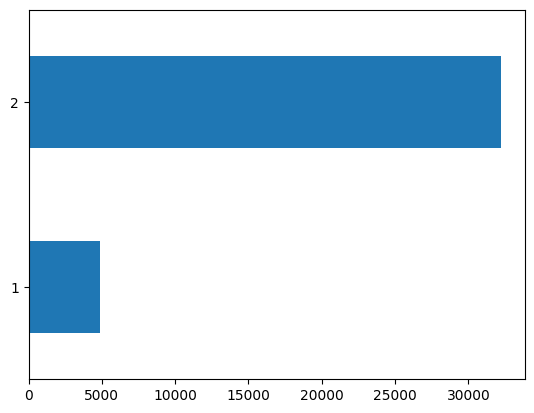

In [19]:
data["Diabetes"].value_counts().sort_index().plot.barh()


In [20]:
data.columns

Index(['Gender', 'Age', 'Systolic', 'Diastolic', 'Weight', 'Body-Mass-Index',
       'Hemoglobin', 'Albumin', 'ALP', 'AST', 'ALT', 'Cholesterol',
       'Creatinine', 'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin',
       'Protein', 'Uric.Acid', 'HDL', 'Glycohemoglobin', 'Moderate-work',
       'Blood-Rel-Diabetes', 'Diabetes'],
      dtype='object')

In [21]:
data.shape

(37079, 25)

This code provides a summary of a DataFrame called "data" including the total number of rows, the number of non-null values in each column, and the data type of each column.

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37079 entries, 0 to 37078
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              37079 non-null  int64  
 1   Age                 37079 non-null  int64  
 2   Systolic            37079 non-null  int64  
 3   Diastolic           37079 non-null  int64  
 4   Weight              37079 non-null  float64
 5   Body-Mass-Index     37079 non-null  float64
 6   Hemoglobin          37079 non-null  float64
 7   Albumin             37079 non-null  int64  
 8   ALP                 37079 non-null  int64  
 9   AST                 37079 non-null  int64  
 10  ALT                 37079 non-null  int64  
 11  Cholesterol         37079 non-null  float64
 12  Creatinine          37079 non-null  float64
 13  GGT                 37079 non-null  int64  
 14  Iron                37079 non-null  float64
 15  LDH                 37079 non-null  int64  
 16  Phos

In [23]:
data = data.astype(float)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37079 entries, 0 to 37078
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              37079 non-null  float64
 1   Age                 37079 non-null  float64
 2   Systolic            37079 non-null  float64
 3   Diastolic           37079 non-null  float64
 4   Weight              37079 non-null  float64
 5   Body-Mass-Index     37079 non-null  float64
 6   Hemoglobin          37079 non-null  float64
 7   Albumin             37079 non-null  float64
 8   ALP                 37079 non-null  float64
 9   AST                 37079 non-null  float64
 10  ALT                 37079 non-null  float64
 11  Cholesterol         37079 non-null  float64
 12  Creatinine          37079 non-null  float64
 13  GGT                 37079 non-null  float64
 14  Iron                37079 non-null  float64
 15  LDH                 37079 non-null  float64
 16  Phos

This code creates a heatmap visualization of the correlation matrix for a DataFrame called "data", using the seaborn library. The figsize parameter sets the size of the plot, and the cmap parameter sets the color palette. The annot parameter adds the correlation values to the heatmap.

<Axes: >

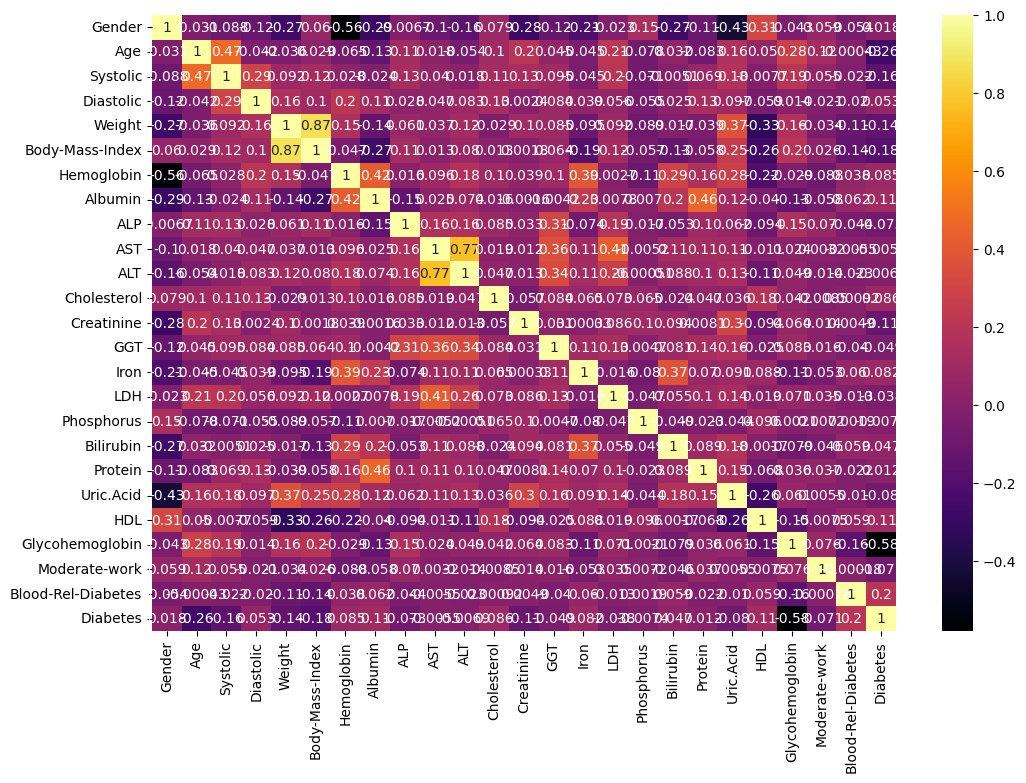

In [24]:
import seaborn as sns
plt.subplots(figsize=(12,8))
sns.heatmap(data.corr(),cmap='inferno', annot=True)

This code creates a boxplot visualization of the distribution of values in each column of a DataFrame called "data", using the matplotlib library. The figsize parameter sets the size of the plot. The patch_artist parameter fills the boxes with color, and the sym parameter sets the style of the outlier points. The plt.xticks(rotation=90) rotates the x-axis labels by 90 degrees for better readability when there are many columns.

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(1, 0, 'Gender'),
  Text(2, 0, 'Age'),
  Text(3, 0, 'Systolic'),
  Text(4, 0, 'Diastolic'),
  Text(5, 0, 'Weight'),
  Text(6, 0, 'Body-Mass-Index'),
  Text(7, 0, 'Hemoglobin'),
  Text(8, 0, 'Albumin'),
  Text(9, 0, 'ALP'),
  Text(10, 0, 'AST'),
  Text(11, 0, 'ALT'),
  Text(12, 0, 'Cholesterol'),
  Text(13, 0, 'Creatinine'),
  Text(14, 0, 'GGT'),
  Text(15, 0, 'Iron'),
  Text(16, 0, 'LDH'),
  Text(17, 0, 'Phosphorus'),
  Text(18, 0, 'Bilirubin'),
  Text(19, 0, 'Protein'),
  Text(20, 0, 'Uric.Acid'),
  Text(21, 0, 'HDL'),
  Text(22, 0, 'Glycohemoglobin'),
  Text(23, 0, 'Moderate-work'),
  Text(24, 0, 'Blood-Rel-Diabetes'),
  Text(25, 0, 'Diabetes')])

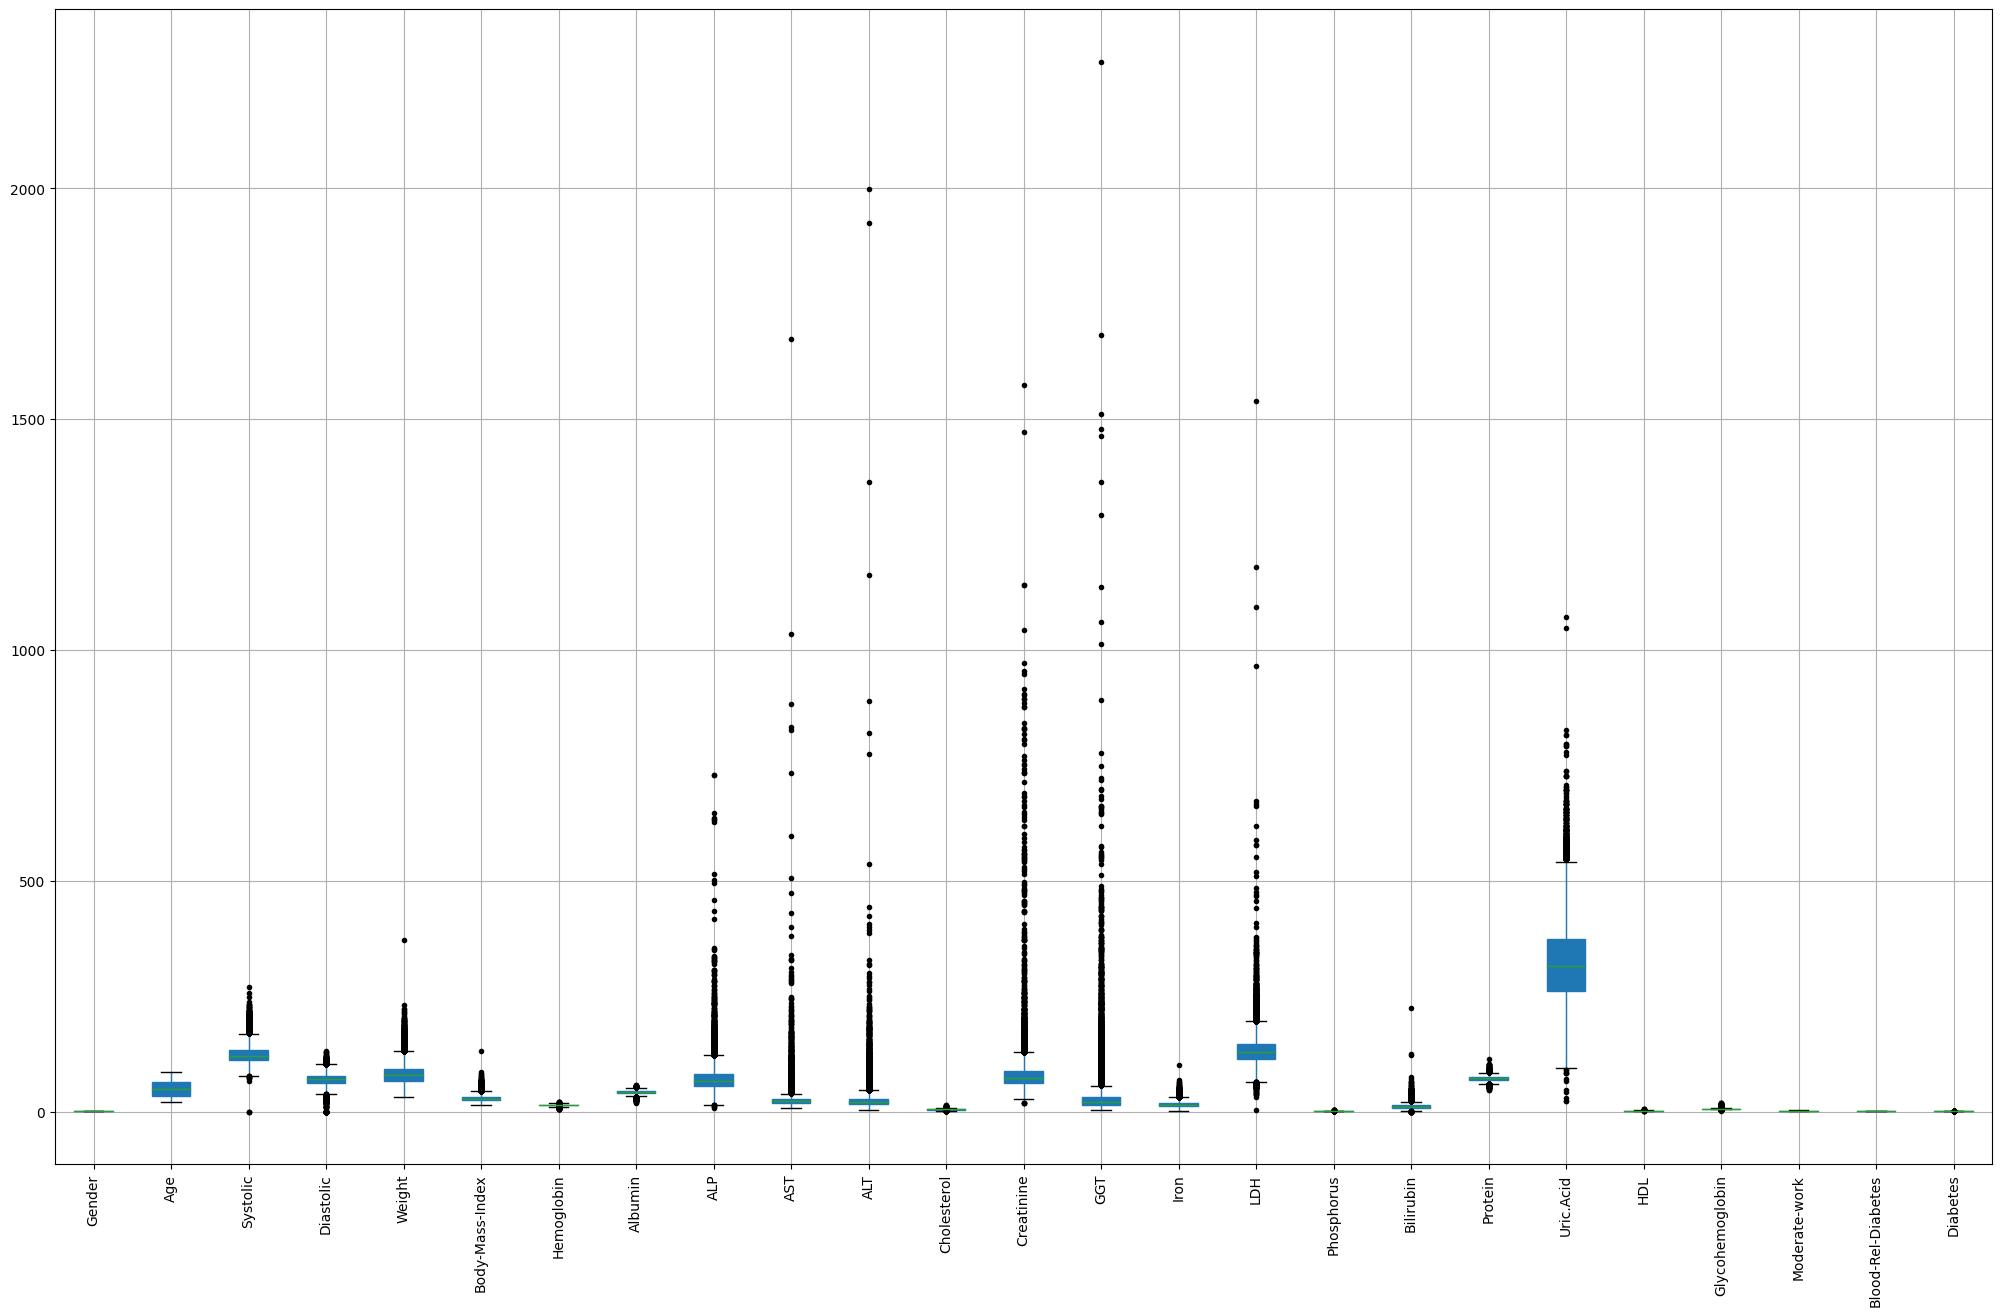

In [25]:
plt.subplots(figsize=(25,15))
data.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)

This code defines a function called "detect_outlier" that takes a feature (i.e. a column of data) as input and returns a Boolean value indicating whether or not the feature has any outlier values. The function calculates the first quartile, third quartile, and interquartile range (IQR) of the feature, and then sets a minimum and maximum threshold for outlier detection based on the IQR. If any values fall outside of the threshold, the function returns True to indicate the presence of outliers. The function is defined over multiple lines and cannot be expressed in a single line.

In [26]:
minimum = 0
maximum = 0

def detect_outlier(feature):
    first_q = np.percentile(feature, 25)
    third_q = np.percentile(feature, 75) 
    IQR = third_q - first_q
    IQR *= 1.5
    minimum = first_q - IQR 
    maximum = third_q + IQR
    flag = False
    
    if(minimum > np.min(feature)):
        flag = True
    if(maximum < np.max(feature)):
        flag = True
    
    return flag

This code removes outliers from all columns of the DataFrame "data" except the last one, by replacing any value that is below the first quartile minus 1.5 times the interquartile range, or above the third quartile plus 1.5 times the interquartile range, with the median value of each respective feature. The code is expressed in a single line using the apply() method with a lambda function.

In [27]:
def  remove_outlier(feature):
    first_q = np.percentile(X[feature], 25)
    third_q = np.percentile(X[feature], 75)
    IQR = third_q - first_q
    IQR *= 1.5
    
    minimum = first_q - IQR # the acceptable minimum value
    maximum = third_q + IQR # the acceptable maximum value
    
    median = X[feature].median()
    
    """
    # any value beyond the acceptance range are considered
    as outliers. 
    # we replace the outliers with the median value of that 
      feature.
    """
    
    X.loc[X[feature] < minimum, feature] = median 
    X.loc[X[feature] > maximum, feature] = median

# taking all the columns except the last one
# last column is the label

X = data.iloc[:, :-1]
for i in range(len(X.columns)): 
        remove_outlier(X.columns[i])

In [28]:
X = data.iloc[:, :-1]


This code loops through all columns in the DataFrame "X" and checks if each column contains any outliers using the previously defined detect_outlier() function. If an outlier is detected in a column, the column name and the message "Contains Outlier" are printed.

In [29]:
for i in range(len(X.columns)):
    if(detect_outlier(X[X.columns[i]])):
        print(X.columns[i], "Contains Outlier")

Systolic Contains Outlier
Diastolic Contains Outlier
Weight Contains Outlier
Body-Mass-Index Contains Outlier
Hemoglobin Contains Outlier
Albumin Contains Outlier
ALP Contains Outlier
AST Contains Outlier
ALT Contains Outlier
Cholesterol Contains Outlier
Creatinine Contains Outlier
GGT Contains Outlier
Iron Contains Outlier
LDH Contains Outlier
Phosphorus Contains Outlier
Bilirubin Contains Outlier
Protein Contains Outlier
Uric.Acid Contains Outlier
HDL Contains Outlier
Glycohemoglobin Contains Outlier


This code applies the remove_outlier() function to all columns in the DataFrame "X" 50 times. The purpose of repeating the outlier removal process multiple times is to ensure that all outliers are detected and removed from the data. The code is expressed in a single line using nested for loops.

In [30]:
for i in range (50):
    for i in range(len(X.columns)):
        remove_outlier(X.columns[i])

This code creates a boxplot of all the columns in the DataFrame "X", with a custom figure size and rotated x-axis labels. The boxplot is displayed with black outliers and colored boxes.

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24]),
 [Text(1, 0, 'Gender'),
  Text(2, 0, 'Age'),
  Text(3, 0, 'Systolic'),
  Text(4, 0, 'Diastolic'),
  Text(5, 0, 'Weight'),
  Text(6, 0, 'Body-Mass-Index'),
  Text(7, 0, 'Hemoglobin'),
  Text(8, 0, 'Albumin'),
  Text(9, 0, 'ALP'),
  Text(10, 0, 'AST'),
  Text(11, 0, 'ALT'),
  Text(12, 0, 'Cholesterol'),
  Text(13, 0, 'Creatinine'),
  Text(14, 0, 'GGT'),
  Text(15, 0, 'Iron'),
  Text(16, 0, 'LDH'),
  Text(17, 0, 'Phosphorus'),
  Text(18, 0, 'Bilirubin'),
  Text(19, 0, 'Protein'),
  Text(20, 0, 'Uric.Acid'),
  Text(21, 0, 'HDL'),
  Text(22, 0, 'Glycohemoglobin'),
  Text(23, 0, 'Moderate-work'),
  Text(24, 0, 'Blood-Rel-Diabetes')])

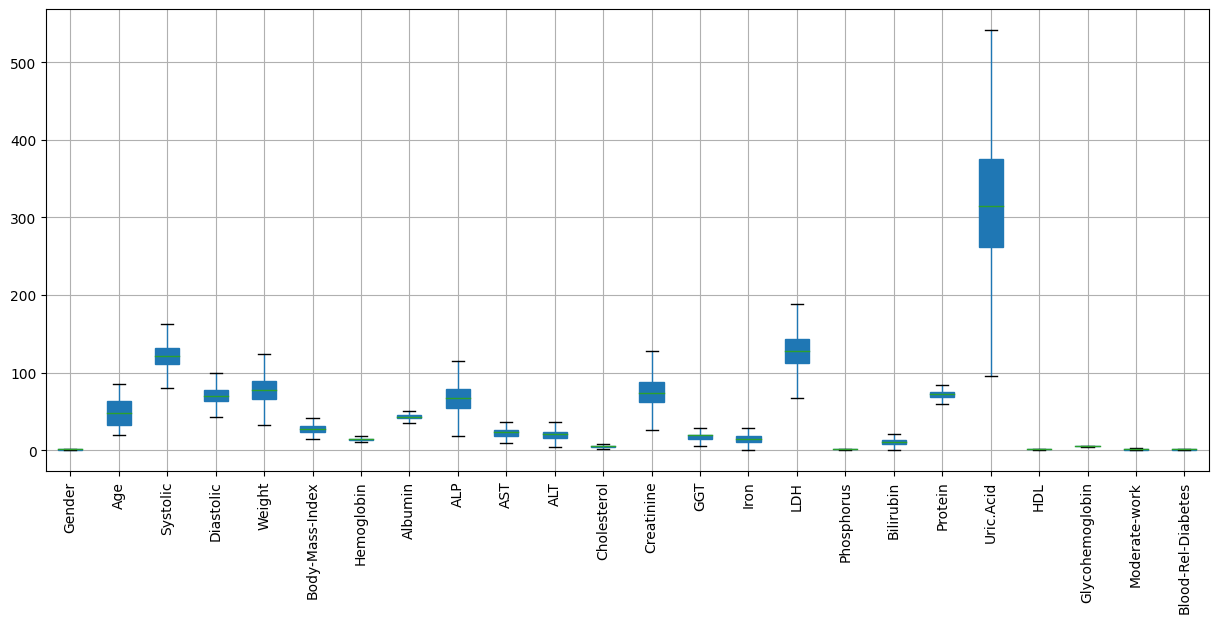

In [31]:
plt.subplots(figsize=(15,6))
X.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)

This code checks for outliers in each column of the DataFrame "X" and prints the name of the column if an outlier is detected. It does this using a for loop and an if statement, which are written in a single line.

In [32]:
for i in range(len(X.columns)):
    if(detect_outlier(X[X.columns[i]])):
        print(X.columns[i], "Contains Outlier")

This is a set of common libraries imported for data preprocessing, visualization, and machine learning model building. It includes libraries such as NumPy, Pandas, Matplotlib, Seaborn, Scikit-learn, and their sub-packages. The libraries are used for tasks such as scaling, encoding, splitting data, building and evaluating models.

In [33]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
#from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

This code standardizes the data using `StandardScaler()` and creates a new dataframe `scaled_df` containing the scaled values with column names from `X`. The scaled dataframe is assigned to `scaled_data` and then converted into a pandas dataframe with column names as `X.columns`.

In [34]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
scaled_df = pd.DataFrame(data = scaled_data, columns = X.columns)
scaled_df.head()


,Gender,Age,Systolic,Diastolic,Weight,Body-Mass-Index,Hemoglobin,Albumin,ALP,AST,...,Iron,LDH,Phosphorus,Bilirubin,Protein,Uric.Acid,HDL,Glycohemoglobin,Moderate-work,Blood-Rel-Diabetes
0,-1.026927,1.557803,-1.550529,-1.364841,-0.200522,-0.594546,-0.059104,0.726296,-0.309102,-0.790869,...,-0.630587,0.501804,-0.794259,0.243672,-0.000498,0.551461,0.177571,-2.261760,2.740933,0.905444
1,-1.026927,0.003128,0.020931,1.166823,0.809160,0.228165,0.219442,0.726296,-0.252824,-0.174965,...,1.813833,0.188553,-0.989929,-0.661559,0.219406,1.070389,-0.715435,0.338547,-1.171490,0.905444
2,-1.026927,-0.663161,-0.044546,2.667068,1.204766,0.525908,1.263992,1.374143,-0.252824,-1.201472,...,-0.630587,0.099053,-0.414776,-1.140799,-0.000498,0.255286,-1.003501,-0.636568,-1.171490,-1.104431
3,-1.026927,1.169134,0.544751,-0.427187,-0.897262,-0.463304,1.821085,-0.893321,1.998322,0.235638,...,-0.464676,2.336562,-1.754823,-0.661559,-1.319924,1.143811,-0.139302,0.013509,2.740933,-1.104431
4,-1.026927,1.779899,0.937616,-0.896014,-0.194617,-0.118549,1.681812,0.726296,2.392272,0.030336,...,-0.531040,0.949306,-0.989929,-0.208944,1.538832,0.626127,-0.830661,1.313662,-1.171490,0.905444


Assign the "Diabetes" column of "data" to a variable named "label" in one line:

```label = data["Diabetes"]```

In [35]:
label = data["Diabetes"]


The `LabelEncoder` object is used to convert the categorical target variable `label` to numerical format, where each unique value of `label` is mapped to an integer. This is necessary for some machine learning algorithms that require numerical input.

In [36]:
encoder = LabelEncoder()
label = encoder.fit_transform(label)

This code splits the data into training and testing sets using the `train_test_split` function from the `sklearn.model_selection` module. The input features `X` are set to the scaled data, and the target variable `y` is set to the encoded labels. The training set consists of 80% of the data, and the remaining 20% is used for testing. The random state parameter is set to 420 to ensure reproducibility.

In [37]:
X = scaled_df
y = label 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

print(X_train.shape, y_test.shape); print(y_train.shape, y_test.shape)

In [38]:
print(X_train.shape, y_test.shape)
print(y_train.shape, y_test.shape)

(29663, 24) (7416,)
(29663,) (7416,)


Perform feature selection using ANOVA F-value as the score function and select the top 20 features using `SelectKBest`.

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

xnew2=SelectKBest(f_classif, k=20).fit_transform(X, y)

This code performs feature selection using the ANOVA F-value method, and prints a sorted table of the feature names and their corresponding F-scores in descending order.

In [40]:
 import sklearn.feature_selection as fs
 import matplotlib.pyplot as plt
 df2 = fs.SelectKBest(k='all')

 df2.fit(X, y)

 names = X.columns.values[df2.get_support()]

 scores = df2.scores_[df2.get_support()]

 names_scores = list(zip(names, scores))

 ns_df = pd.DataFrame(data = names_scores, columns=

  ['Features','F_Scores'])

 ns_df_sorted = ns_df.sort_values(['F_Scores','Features'], ascending =

  [False, True])

 print(ns_df_sorted)

              Features     F_Scores
1                  Age  2686.409705
23  Blood-Rel-Diabetes  1536.785191
5      Body-Mass-Index  1000.670115
2             Systolic   766.368625
4               Weight   526.900940
7              Albumin   525.811066
21     Glycohemoglobin   477.417483
20                 HDL   378.750379
11         Cholesterol   334.923024
13                 GGT   305.472574
6           Hemoglobin   270.428079
14                Iron   211.216877
22       Moderate-work   188.266414
8                  ALP   156.172300
19           Uric.Acid   144.722845
12          Creatinine   102.880413
17           Bilirubin    80.463331
3            Diastolic    63.316044
15                 LDH    49.826302
10                 ALT    27.645892
9                  AST    22.682305
0               Gender    12.219556
18             Protein     8.581358
16          Phosphorus     0.000433


This code performs a grid search using logistic regression to find the best class weights to use to maximize accuracy. It creates a list of weights to test, sets up the grid search using these weights, fits it to the data, and prints the best parameters. Finally, it creates a plot showing how the weights affect the mean test score.

Best parameters : {'class_weight': {0: 0.5236842105263158, 1: 0.47631578947368425}}


<Axes: xlabel='weight'>

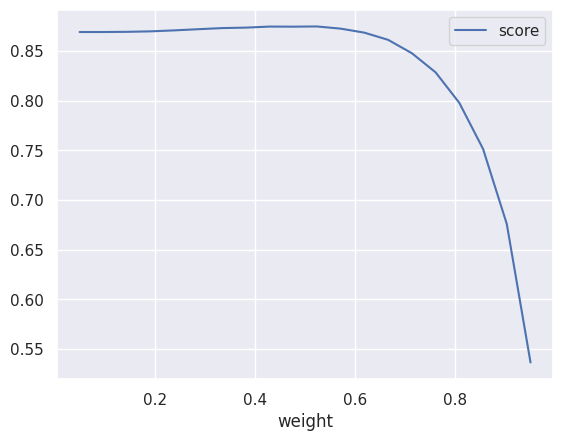

In [41]:
from sklearn.model_selection import GridSearchCV

weights = np.linspace(0.05, 0.95, 20)

gsc = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='accuracy',
    cv=15
)
grid_result = gsc.fit(X, y)

print("Best parameters : %s" % grid_result.best_params_)

# Plot the weights vs f1 score
dataz = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                       'weight': weights })
dataz.plot(x='weight')

This line sets the class weight of a logistic regression model to be used in classification. The class weight specifies the importance of each class in the classification task. In this case, class 0 is assigned a weight of 0.5236842105263158 and class 1 is assigned a weight of 0.47631578947368425.

In [42]:
class_weight = {0: 0.5236842105263158,
                1: 0.47631578947368425}

Trains a logistic regression model with balanced class weights on the training data, predicts on the test data, and evaluates the model using classification report and confusion matrix. Finally, plots the ROC curve and calculates the AUC score.

In [ ]:
#LR

              precision    recall  f1-score   support

           0       0.30      0.76      0.43       951
           1       0.95      0.73      0.83      6465

    accuracy                           0.74      7416
   macro avg       0.62      0.75      0.63      7416
weighted avg       0.87      0.74      0.78      7416



0.7472256581788373

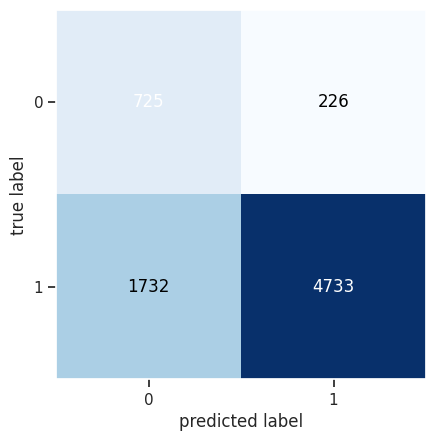

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix
from matplotlib import pyplot as plt
lr = LogisticRegression(class_weight='balanced',random_state=420)

# Fit..
lr.fit(X_train, y_train)

# Predict..
y_pred = lr.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
plot_confusion_matrix(confusion_matrix(y_test, y_pred))
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc


This code trains a support vector machine classifier with a radial basis function kernel on the data, using balanced class weights to address class imbalance. It then predicts on the test set and evaluates the model using a confusion matrix and classification report. Finally, it plots the confusion matrix and calculates the ROC AUC score.

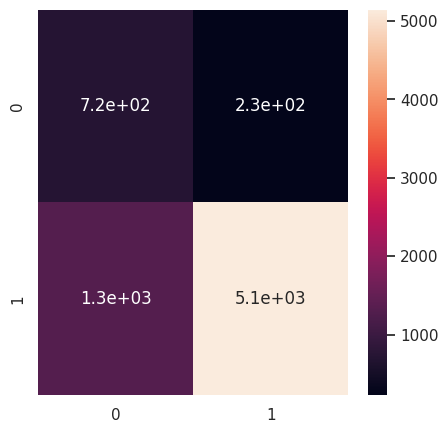

              precision    recall  f1-score   support

           0       0.35      0.76      0.48       951
           1       0.96      0.80      0.87      6465

    accuracy                           0.79      7416
   macro avg       0.65      0.78      0.67      7416
weighted avg       0.88      0.79      0.82      7416

              precision    recall  f1-score   support

           0       0.35      0.76      0.48       951
           1       0.96      0.80      0.87      6465

    accuracy                           0.79      7416
   macro avg       0.65      0.78      0.67      7416
weighted avg       0.88      0.79      0.82      7416



0.7763060498046994

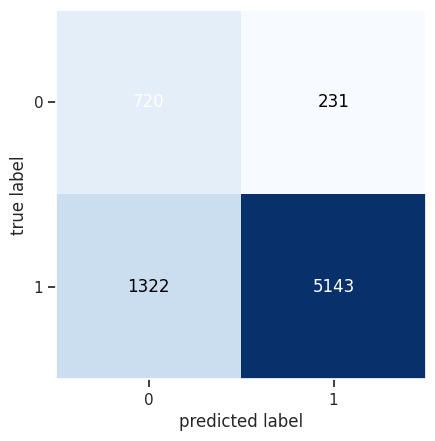

In [44]:
from sklearn.svm import SVC

clf_svc_rbf = SVC(kernel="rbf",class_weight='balanced',random_state=4200)
clf_svc_rbf.fit(X_train,y_train)
y_pred_clf_svc_rbf = clf_svc_rbf.predict(X_test)


import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred_clf_svc_rbf)

plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True)
plt.show()

print(classification_report(y_test,y_pred_clf_svc_rbf))

print(classification_report(y_test, y_pred_clf_svc_rbf))
plot_confusion_matrix(confusion_matrix(y_test, y_pred_clf_svc_rbf))

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_clf_svc_rbf)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc


This code trains a random forest classifier on X_train and y_train data, and makes predictions on X_test using the trained classifier. It then calculates the confusion matrix and classification report of the predictions. Finally, it generates an ROC curve and calculates the AUC score, which measures the performance of the classifier in distinguishing between positive and negative classes.

              precision    recall  f1-score   support

           0       0.69      0.27      0.39       951
           1       0.90      0.98      0.94      6465

    accuracy                           0.89      7416
   macro avg       0.80      0.63      0.67      7416
weighted avg       0.87      0.89      0.87      7416



0.6277268280305748

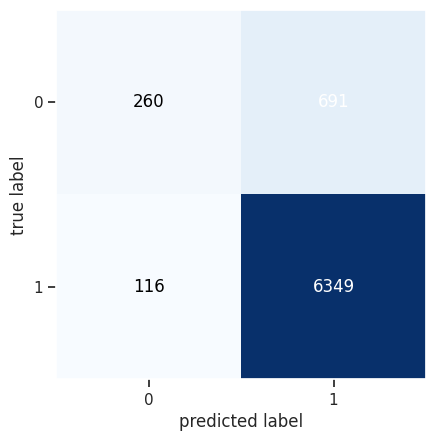

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rd = RandomForestClassifier(class_weight='balanced',random_state=4200)
rd.fit(X_train,y_train)
y_pred_rd = rd.predict(X_test)


import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred_rd)

#plt.figure(figsize=(5,5))
#sns.heatmap(cm,annot=True,linewidths=.3)
#plt.show()

print(classification_report(y_test,y_pred_rd))
plot_confusion_matrix(confusion_matrix(y_test, y_pred_rd))

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_rd)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc


This code evaluates the accuracy of a Support Vector Machine model using cross-validation. It creates a model with an RBF kernel, C=1, and balanced class weights. It then uses the ShuffleSplit method to create 10 splits of the data and calculates the accuracy scores for each split. Finally, it prints the mean and standard deviation of the accuracy scores.

## SVM

In [46]:

# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LogisticRegression

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
# create model
model = SVC(kernel='rbf', C=1, class_weight=class_weight)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))
scores

Accuracy: 0.8808 (0.0038)


array([0.88174218, 0.88214671, 0.87769687, 0.88268608, 0.875     ,
       0.8855178 , 0.875     , 0.8812028 , 0.87958468, 0.88700108])

In [47]:
!apt-get install build-essential python3-dev -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-dev is already the newest version (3.8.2-0ubuntu2).
python3-dev set to manually installed.
build-essential is already the newest version (12.8ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [48]:
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1


In [49]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


This code loads the breast cancer dataset and uses SVM classification to plot Receiver Operating Characteristic (ROC) curves. It uses Stratified K-Fold cross-validation to split the data and computes the area under the curve (AUC) for each fold. Finally, it plots the mean ROC curve with the standard deviation shaded.

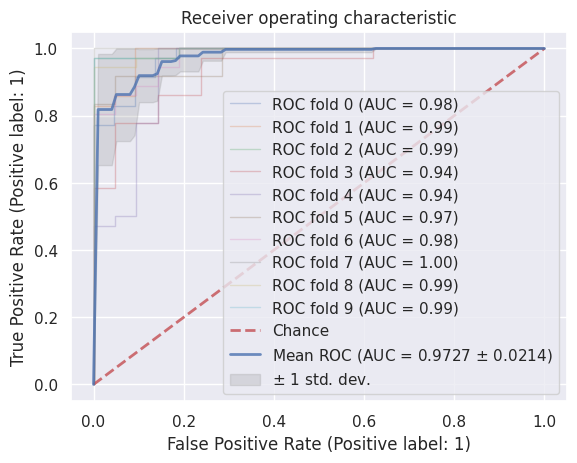

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import check_random_state
from sklearn.metrics import RocCurveDisplay
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.model_selection import StratifiedKFold

# Load dataset
X, y = datasets.load_breast_cancer(return_X_y=True)

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
classifier = svm.SVC(kernel='rbf', probability=True, random_state=check_random_state(42))


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(classifier, X[test], y[test],name='ROC fold {}'.format(i), alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.4f $\pm$ %0.4f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic")
ax.legend(loc="lower right")



# LR

This code uses logistic regression to create a model and evaluates its performance using cross-validation with a shuffle split. It prints the accuracy score with its standard deviation.

In [51]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LogisticRegression

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
# create model
model = LogisticRegression(class_weight=class_weight)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))
scores

Accuracy: 0.9553 (0.0127)


array([0.95614035, 0.93859649, 0.97368421, 0.95614035, 0.95614035,
       0.95614035, 0.92982456, 0.95614035, 0.97368421, 0.95614035])

This code performs a classification and ROC analysis using cross-validation. It uses the `LogisticRegression` classifier from Scikit-learn and the `plot_roc` function from Scikit-plot to plot the ROC curves. The `ShuffleSplit` function is used to split the data into training and test sets for cross-validation. The code then calculates and plots the mean ROC curve and the standard deviation of the ROC curves. Finally, it displays the plot.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

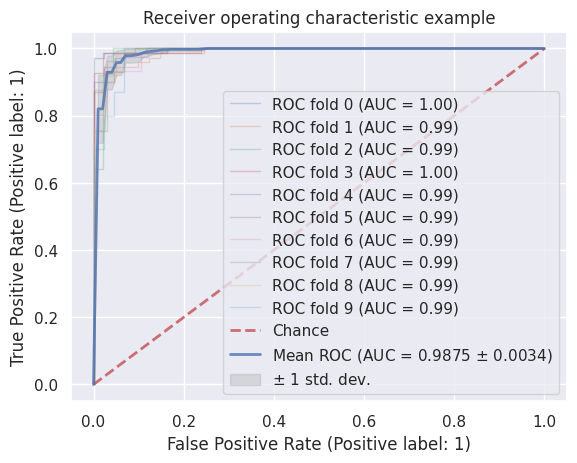

In [52]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from scikitplot.metrics import plot_roc
from sklearn.model_selection import StratifiedKFold

# #############################################################################

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
classifier = LogisticRegression(class_weight=class_weight,random_state=42)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
#for i, (train, test) in enumerate(cv.split(X, y)):
#    classifier.fit(X, y)
 #   viz = plot_roc(classifier, X, y,
  #                       name='ROC fold {}'.format(i),
   #                      alpha=0.3, lw=1, ax=ax)
    #interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    #interp_tpr[0] = 0.0
    #tprs.append(interp_tpr)
    #aucs.append(viz.roc_auc)
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(classifier, X[test], y[test],
                                          name='ROC fold {}'.format(i),
                                          alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.4f $\pm$ %0.4f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

## RF

This code evaluates the performance of a Random Forest Classifier model using cross-validation. It splits the data into 10 random subsets, trains the model on 8 of them and tests it on the remaining 2, repeating the process 10 times. It then calculates the accuracy score for each of these tests and outputs the mean and standard deviation of these scores as a measure of the model's performance.

In [53]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import ShuffleSplit

# prepare the cross-validation procedure
#cv = KFold(n_splits=5, test_size= 0.2, random_state=0)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
# create model
model = RandomForestClassifier(class_weight=class_weight)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))
scores

Accuracy: 0.9640 (0.0100)


array([0.96491228, 0.97368421, 0.94736842, 0.95614035, 0.97368421,
       0.98245614, 0.96491228, 0.96491228, 0.95614035, 0.95614035])

This code performs cross-validation and plots the Receiver Operating Characteristic (ROC) curve for a Random Forest classifier. It uses ShuffleSplit for cross-validation, RandomForestClassifier for the model, and RocCurveDisplay to plot the ROC curve. The loop fits the classifier using X[train], y[train] instead of X, y.

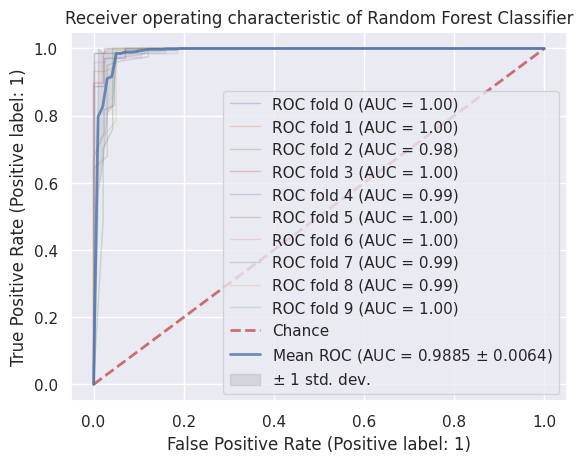

In [54]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay

# #############################################################################

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
classifier = RandomForestClassifier(class_weight=class_weight, random_state=42)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(classifier, X[test], y[test],
                                          name='ROC fold {}'.format(i),
                                          alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.4f $\pm$ %0.4f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic of Random Forest Classifier")
ax.legend(loc="lower right")
plt.show()


#Changes made:

#Imported ShuffleSplit and RandomForestClassifier
#Replaced plot_roc_curve with RocCurveDisplay.from_estimator
#Modified the loop to fit the classifier using X[train], y[train] instead of X, y
#Removed the comments related to data IO and generation since they are not relevant to the code shown here.


## DT

This code uses cross-validation to evaluate the performance of a Decision Tree Classifier on a dataset. It generates 10 randomized train/test splits using ShuffleSplit and calculates the accuracy of the model using cross_val_score. Finally, it reports the mean and standard deviation of the accuracy scores.

In [55]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier


# prepare the cross-validation procedure
#cv = KFold(n_splits=5, test_size= 0.2, random_state=0)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
# create model
model = DecisionTreeClassifier(class_weight=class_weight)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))
scores

Accuracy: 0.9237 (0.0283)


array([0.96491228, 0.89473684, 0.87719298, 0.88596491, 0.92105263,
       0.94736842, 0.92982456, 0.93859649, 0.92105263, 0.95614035])

1. Import necessary libraries and modules including numpy, matplotlib, sklearn and scikitplot.
2. Fit a decision tree classifier with cross-validation and plot ROC curves with mean ROC and standard deviation range. The resulting plot is displayed using `plt.show()`.
3.This code is for training a decision tree classifier and plotting its ROC curve using cross-validation.

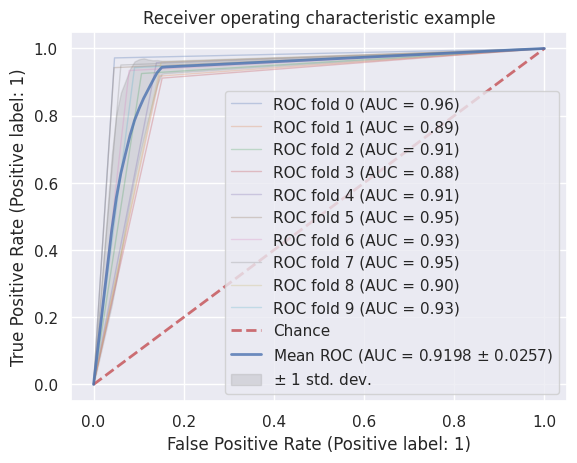

In [56]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from scikitplot.metrics import plot_roc
from sklearn.model_selection import StratifiedKFold

# #############################################################################

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
classifier = DecisionTreeClassifier(class_weight=class_weight,random_state=42)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(classifier, X[test], y[test],
                                          name='ROC fold {}'.format(i),
                                          alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.4f $\pm$ %0.4f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

- Cross-validate an SVM classifier with a radial basis function kernel and C=1, and print the mean and standard deviation of the accuracy scores.
- Fit the classifier to the training data, evaluate its accuracy on the test data, and print the test accuracy score.

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn import svm

clf = svm.SVC(kernel='rbf', C=1, class_weight=class_weight)
scores = cross_val_score(clf, X, y, cv=5)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

clf.fit(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)
print("Test Accuracy: %0.4f" % test_accuracy)


Accuracy: 0.9104 (+/- 0.0824)
Test Accuracy: 0.8808


## ANN

This code trains a neural network model using the Keras library for a binary classification task. The model has several hidden layers and dropout regularization to prevent overfitting. The model is trained using the Adam optimizer and binary cross-entropy loss, and the training progress is monitored using accuracy as the evaluation metric. The training and validation data is provided as input to the model.

In [58]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

classifier=Sequential()
classifier.add(Dense(units=256, kernel_initializer='uniform',activation='relu',input_dim=24))
classifier.add(Dense(units=128, kernel_initializer='uniform',activation='relu'))
classifier.add(Dropout(rate=0.5))
classifier.add(Dense(units=64, kernel_initializer='uniform',activation='relu'))
classifier.add(Dropout(rate=0.4))
classifier.add(Dense(units=32, kernel_initializer='uniform',activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='uniform',activation='sigmoid'))

classifier.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])
classifier.fit(X_train,y_train,batch_size=10,epochs=100,class_weight=class_weight,validation_data=(X_test, y_test))


Epoch 1/100
2967/2967 [==============================] - 15s 4ms/step - loss: 0.1535 - accuracy: 0.8768 - val_loss: 0.2860 - val_accuracy: 0.8867
Epoch 2/100
2967/2967 [==============================] - 10s 3ms/step - loss: 0.1414 - accuracy: 0.8910 - val_loss: 0.2722 - val_accuracy: 0.8936
Epoch 3/100
2967/2967 [==============================] - 14s 5ms/step - loss: 0.1373 - accuracy: 0.8959 - val_loss: 0.2660 - val_accuracy: 0.8978
Epoch 4/100
2967/2967 [==============================] - 14s 5ms/step - loss: 0.1328 - accuracy: 0.8997 - val_loss: 0.2629 - val_accuracy: 0.8940
Epoch 5/100
2967/2967 [==============================] - 12s 4ms/step - loss: 0.1300 - accuracy: 0.9010 - val_loss: 0.2615 - val_accuracy: 0.8940
Epoch 6/100
2967/2967 [==============================] - 14s 5ms/step - loss: 0.1274 - accuracy: 0.9000 - val_loss: 0.2543 - val_accuracy: 0.8993
Epoch 7/100
2967/2967 [==============================] - 10s 3ms/step - loss: 0.1257 - accuracy: 0.9026 - val_loss: 0.2577 -

ROC (Receiver Operating Characteristic) AUC (Area Under the Curve) is a measure of how well a binary classification model is able to distinguish between positive and negative classes. It's a plot of true positive rate against false positive rate for varying threshold values. The higher the AUC score, the better the model is at correctly predicting the positive class. A score of 1.0 indicates a perfect classifier, while a score of 0.5 indicates a random classifier.

In [59]:
#clf_svc_rbf.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,auc,f1_score
y_pred = classifier.predict(X_test)>0.9


import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred)


#print(classification_report(y_test,y_pred_clf_svc_rbf))

print(classification_report(y_test, y_pred))
#plot_confusion_matrix(confusion_matrix(y_test, y_pred))

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

232/232 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.42      0.53      0.47       951
           1       0.93      0.89      0.91      6465

    accuracy                           0.84      7416
   macro avg       0.67      0.71      0.69      7416
weighted avg       0.86      0.84      0.85      7416



0.7111246922887375

This code calculates the Receiver Operating Characteristic (ROC) curve and Area Under the Curve (AUC) for a binary classification model's predictions. The ROC curve is a graphical representation of the trade-off between the true positive rate (TPR) and false positive rate (FPR) of a model's predictions, as the decision threshold is varied. The AUC score summarizes the overall performance of the model based on the ROC curve. The code plots the ROC curve and prints the AUC score.

AUC Score: 0.7111246922887375


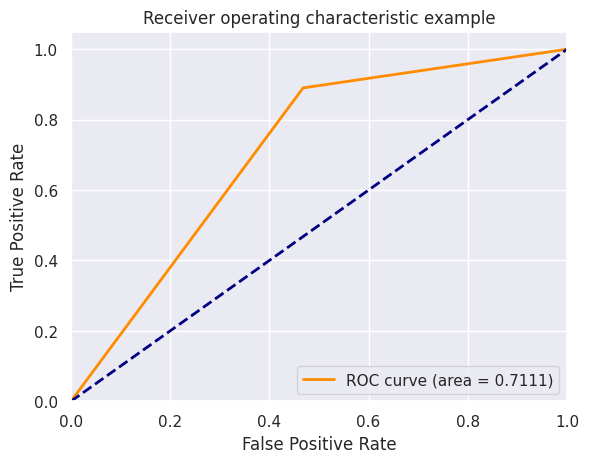

In [60]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import auc

fpr , tpr , thresholds = roc_curve ( y_test , y_pred)
auc_keras = auc(fpr, tpr)
print("AUC Score:",auc_keras)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % auc_keras)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

This code uses the DecisionTreeClassifier from the scikit-learn library to train a decision tree model, and performs cross-validation to evaluate the accuracy of the model. The average accuracy and the standard deviation of the cross-validation scores are printed as output.

In [61]:
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import cross_val_score

dt = DecisionTreeClassifier(class_weight=class_weight)
scores = cross_val_score(clf, X, y, cv=5)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.9104 (+/- 0.0824)


The below given code trains a logistic regression model on the training data (X_train and y_train) and predicts the labels of the test data (X_test) using the trained model. It then computes and displays the confusion matrix and classification report. Finally, it computes the F1-score and the area under the receiver operating characteristic curve (ROC AUC) for the logistic regression model.

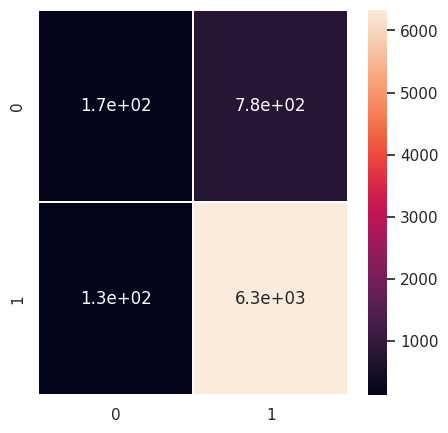

              precision    recall  f1-score   support

           0       0.56      0.18      0.27       951
           1       0.89      0.98      0.93      6465

    accuracy                           0.88      7416
   macro avg       0.73      0.58      0.60      7416
weighted avg       0.85      0.88      0.85      7416

0.60190880124829


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,auc,f1_score

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_logistic = lr.predict(X_test)

import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred_logistic)

plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=.3)
plt.show()

print(classification_report(y_test,y_pred_logistic))


from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_logistic)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
print(f1_score(y_test, y_pred_logistic,average="macro"))

The code creates a voting classifier that combines four different models: SVM, Logistic Regression, Random Forest, and Decision Tree. It then uses cross-validation to calculate the accuracy scores for each of the individual models and the ensemble model. Finally, it prints the mean accuracy score and standard deviation for the ensemble model.

In [63]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
clf2 = make_pipeline(scaler, LogisticRegression(class_weight=class_weight,random_state=42))
clf1 = SVC(kernel='rbf', C=1, class_weight=class_weight,random_state=42)
clf3 = RandomForestClassifier(class_weight=class_weight,random_state=42)
clf4 = DecisionTreeClassifier(class_weight=class_weight,random_state=42)


eclf = VotingClassifier( estimators=[('svm', clf1), ('lr', clf2), ('rf', clf3), ('dt',clf4)],
     voting='hard')

for clf, label in zip([clf1, clf2, clf3,clf4 ,eclf], ['SVM', 'LR', 'RF','DT', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(), label))
scores


Accuracy: 0.9684 (+/- 0.0233) [Ensemble]


array([0.92982456, 0.95614035, 0.99122807, 0.99122807, 0.97345133])

##CNN

This code creates a sequential neural network model using Keras with several layers including Conv1D, MaxPooling1D, Flatten, and Dense. The model is compiled using the Adam optimizer and binary cross-entropy loss, and then fit to the training data. The training data is reshaped to be compatible with the Conv1D layer, and the class_weight parameter is used to account for imbalanced classes.

In [64]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten

classifier = Sequential()

# Add a 1D convolutional layer
classifier.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
classifier.add(MaxPooling1D(pool_size=2))

# Add a flatten layer to transform the 3D output into 2D
classifier.add(Flatten())

# Add fully connected layers
classifier.add(Dense(units=256, kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(rate=0.5))
classifier.add(Dense(units=128, kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(rate=0.4))
classifier.add(Dense(units=64, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

classifier.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
classifier.fit(X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1), y_train,
               batch_size=10, epochs=100, class_weight=class_weight,
               validation_data=(X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1), y_test))

Epoch 1/100
2967/2967 [==============================] - 20s 6ms/step - loss: 0.1640 - accuracy: 0.8707 - val_loss: 0.2919 - val_accuracy: 0.8823
Epoch 2/100
2967/2967 [==============================] - 19s 6ms/step - loss: 0.1529 - accuracy: 0.8777 - val_loss: 0.2894 - val_accuracy: 0.8799
Epoch 3/100
2967/2967 [==============================] - 21s 7ms/step - loss: 0.1505 - accuracy: 0.8811 - val_loss: 0.2871 - val_accuracy: 0.8859
Epoch 4/100
2967/2967 [==============================] - 27s 9ms/step - loss: 0.1473 - accuracy: 0.8826 - val_loss: 0.2836 - val_accuracy: 0.8827
Epoch 5/100
2967/2967 [==============================] - 21s 7ms/step - loss: 0.1453 - accuracy: 0.8857 - val_loss: 0.2842 - val_accuracy: 0.8840
Epoch 6/100
2967/2967 [==============================] - 18s 6ms/step - loss: 0.1436 - accuracy: 0.8869 - val_loss: 0.2773 - val_accuracy: 0.8883
Epoch 7/100
2967/2967 [==============================] - 19s 6ms/step - loss: 0.1419 - accuracy: 0.8873 - val_loss: 0.2750 -

The code defines a Convolutional Neural Network (CNN) model using Keras for a binary classification task on a dataset. It includes layers such as Conv1D, MaxPooling1D, Dropout, and Dense. The model is trained and validated on the training and validation datasets respectively. The test set is then used to generate predictions, which are evaluated using a confusion matrix, classification report, and ROC curve.

232/232 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.35      0.71      0.47       951
           1       0.95      0.80      0.87      6465

    accuracy                           0.79      7416
   macro avg       0.65      0.76      0.67      7416
weighted avg       0.87      0.79      0.82      7416

AUC Score: 0.7584003649839832


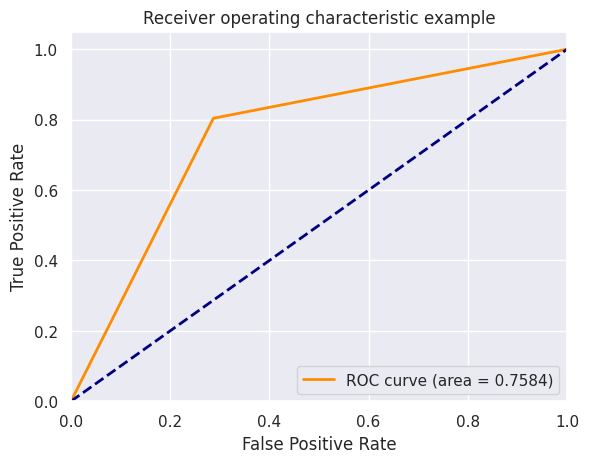

In [ ]:
# Convert X_test to numpy array
X_test = np.array(X_test)

# Reshape X_test for CNN input
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Generate predictions for test set
y_pred = classifier.predict(X_test) > 0.9

# Generate confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Generate ROC curve and calculate AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("AUC Score:", roc_auc)
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


This code is performing a classification and ROC analysis. It uses a random forest classifier with cross-validation and plots ROC curves for each fold. The output includes the mean ROC curve, the area under the ROC curve, and the chance line. The purpose of the analysis is to evaluate the performance of the classifier and its ability to distinguish between positive and negative classes.

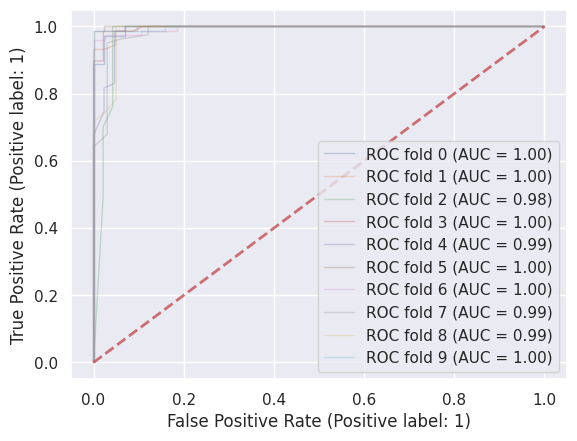

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay

# #############################################################################

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
classifier = RandomForestClassifier(class_weight=class_weight, random_state=42)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(classifier, X[test], y[test],
                                          name='ROC fold {}'.format(i),
                                          alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)